In [ ]:
import pandas as pd

csv_datei = 'mushrooms.csv'
df = pd.read_csv(csv_datei)

print (df.head(10))


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   


In [ ]:
for spalte in df.columns:
    print(f"\nSpalte: {spalte}")
    print(df[spalte].value_counts(dropna=False))


Spalte: class
class
e    4208
p    3916
Name: count, dtype: int64

Spalte: cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Spalte: cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Spalte: cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Spalte: bruises
bruises
f    4748
t    3376
Name: count, dtype: int64

Spalte: odor
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Spalte: gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Spalte: gill-spacing
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Spalte: gill-size
gill-size
b    5612
n    2512
Name: count, dtype: int64

Spalte: gill-color
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e   

In [ ]:
#2480 missing values in stalk-root
# Either dopr colum/Rows, Fill up with most common value/ or just treat as a value itself.
#predict class e(edible) p(poisonous)
#One hot encoding for all categorical Features


🔍 Categorical Naive Bayes:
              precision    recall  f1-score   support

           e       0.91      1.00      0.95      1257
           p       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



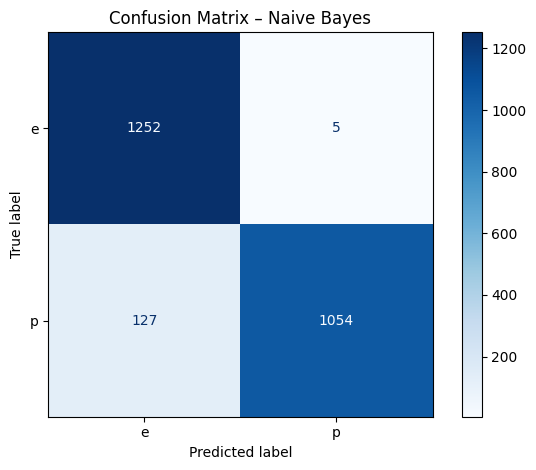


🔍 Logistische Regression (L1):
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



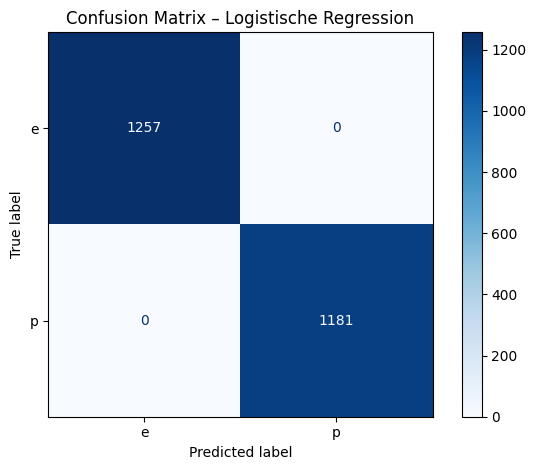

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# load data
data = pd.read_csv('mushrooms.csv')

# split in x and y, Dropp veil-type
X = data.drop(['class','veil-type'], axis=1)
y = data['class']

# Encode label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# Features
categorical_features = X.columns.tolist()

# Encoding
ohe_encoder = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

ordinal_encoder = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_features)
])

# ================================
# Categorical Naive Bayes
# ================================

nb_pipeline = Pipeline([
    ('encoder', ordinal_encoder),
    ('clf', CategoricalNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)
y_pred_nb_labels = label_encoder.inverse_transform(y_pred_nb)

print("Categorical Naive Bayes:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_nb_labels))

cm = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_nb_labels)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix – Naive Bayes")
plt.tight_layout()
plt.show()

# ================================
# logististic regression
# ================================

logreg_pipeline = Pipeline([
    ('encoder', ohe_encoder),
    ('clf', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_logreg_labels = label_encoder.inverse_transform(y_pred_logreg)

print("Logistic Regression (L1):")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_logreg_labels))

cm = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_logreg_labels)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()


🔍 Logistische Regression (L1):
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



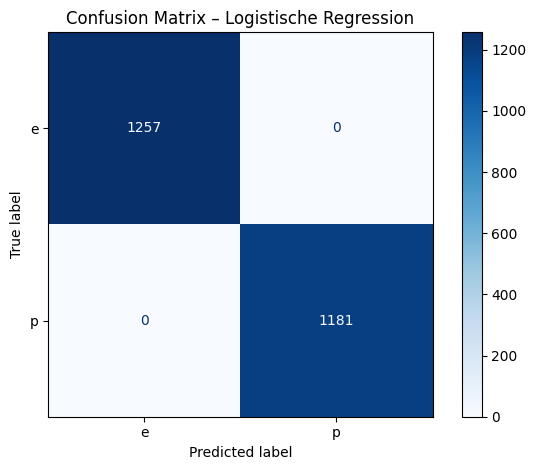

Active Features (L1):
cat__cap-shape_b: 0.1072
cat__cap-surface_f: -0.5050
cat__cap-color_w: 0.5339
cat__odor_a: -8.8432
cat__odor_f: 5.1736
cat__odor_l: -8.8076
cat__odor_n: -8.5782
cat__gill-spacing_c: 0.1468
cat__gill-spacing_w: -0.3681
cat__gill-size_n: 4.9743
cat__gill-color_b: 0.0021
cat__stalk-root_b: 0.5013
cat__stalk-surface-above-ring_k: 2.6274
cat__stalk-surface-below-ring_f: -0.4802
cat__stalk-surface-below-ring_y: 3.0973
cat__stalk-color-below-ring_n: -0.0635
cat__spore-print-color_r: 11.5269
cat__spore-print-color_w: 0.9129
cat__population_c: 2.6011
cat__population_y: -0.3431
cat__habitat_w: -0.0516


In [ ]:
logreg_pipeline = Pipeline([
    ('encoder', ohe_encoder),
    ('clf', LogisticRegression(penalty='l1',solver='liblinear',C=1,max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_logreg_labels = label_encoder.inverse_transform(y_pred_logreg)

print("Logistische Regression (L1):")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_logreg_labels))

cm = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_logreg_labels)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

# 🔍 active Features
logreg_model = logreg_pipeline.named_steps['clf']
logreg_encoder = logreg_pipeline.named_steps['encoder']
logreg_features = logreg_encoder.get_feature_names_out()
coeffs = logreg_model.coef_[0]

print("Active Features (L1):")
for name, coef in zip(logreg_features, coeffs):
    if coef != 0:
        print(f"{name}: {coef:.4f}")


🔍 Categorical Naive Bayes:
              precision    recall  f1-score   support

           e       0.97      1.00      0.98      1257
           p       0.99      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



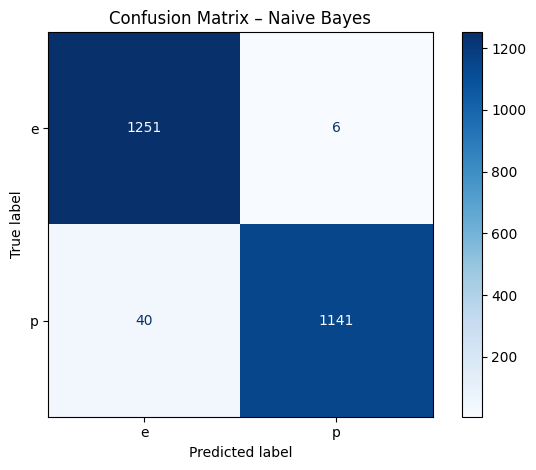

In [ ]:
data = pd.read_csv('mushrooms.csv')

# X and Y with most informative Features for x
X = data[[
    'cap-surface',
    'cap-color',
    'odor',
    'gill-spacing',
    'gill-size',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-below-ring',
    'spore-print-color',
    'population',
    'habitat'
]]
y = data['class']

# encode Label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)
categorical_features = X.columns.tolist()
ordinal_encoder = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_features)
])

# ================================
# Categorical Naive Bayes
# ================================

nb_pipeline = Pipeline([
    ('encoder', ordinal_encoder),
    ('clf', CategoricalNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)
y_pred_nb_labels = label_encoder.inverse_transform(y_pred_nb)

print("Categorical Naive Bayes:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_nb_labels))

cm = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_nb_labels)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix – Naive Bayes")
plt.tight_layout()
plt.show()